In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/kashishmandhane/Documents/Kashish Data/Coding/End-to-End_ML/loan_approval/Loan.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,01/01/18,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,02/01/18,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,03/01/18,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,04/01/18,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,05/01/18,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


# Data Analysis

## Visualizations

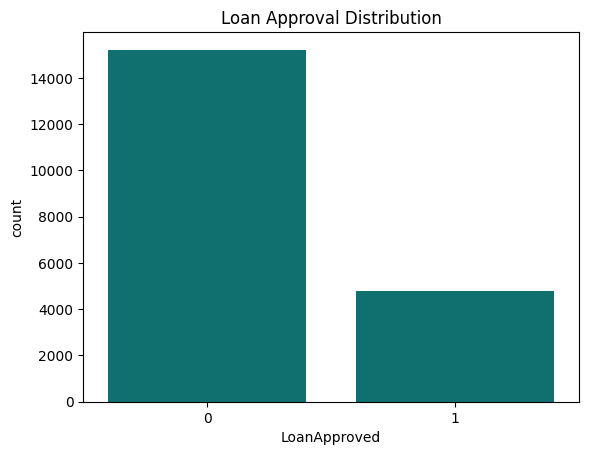

In [3]:
# Loan Approval Distribution
sns.countplot(x=df["LoanApproved"],color="teal")
plt.title("Loan Approval Distribution")
plt.show()

As seen from the box plot, there is a class imbalance, as more than 14000 loans get disapproved and only about 5000 get approved.

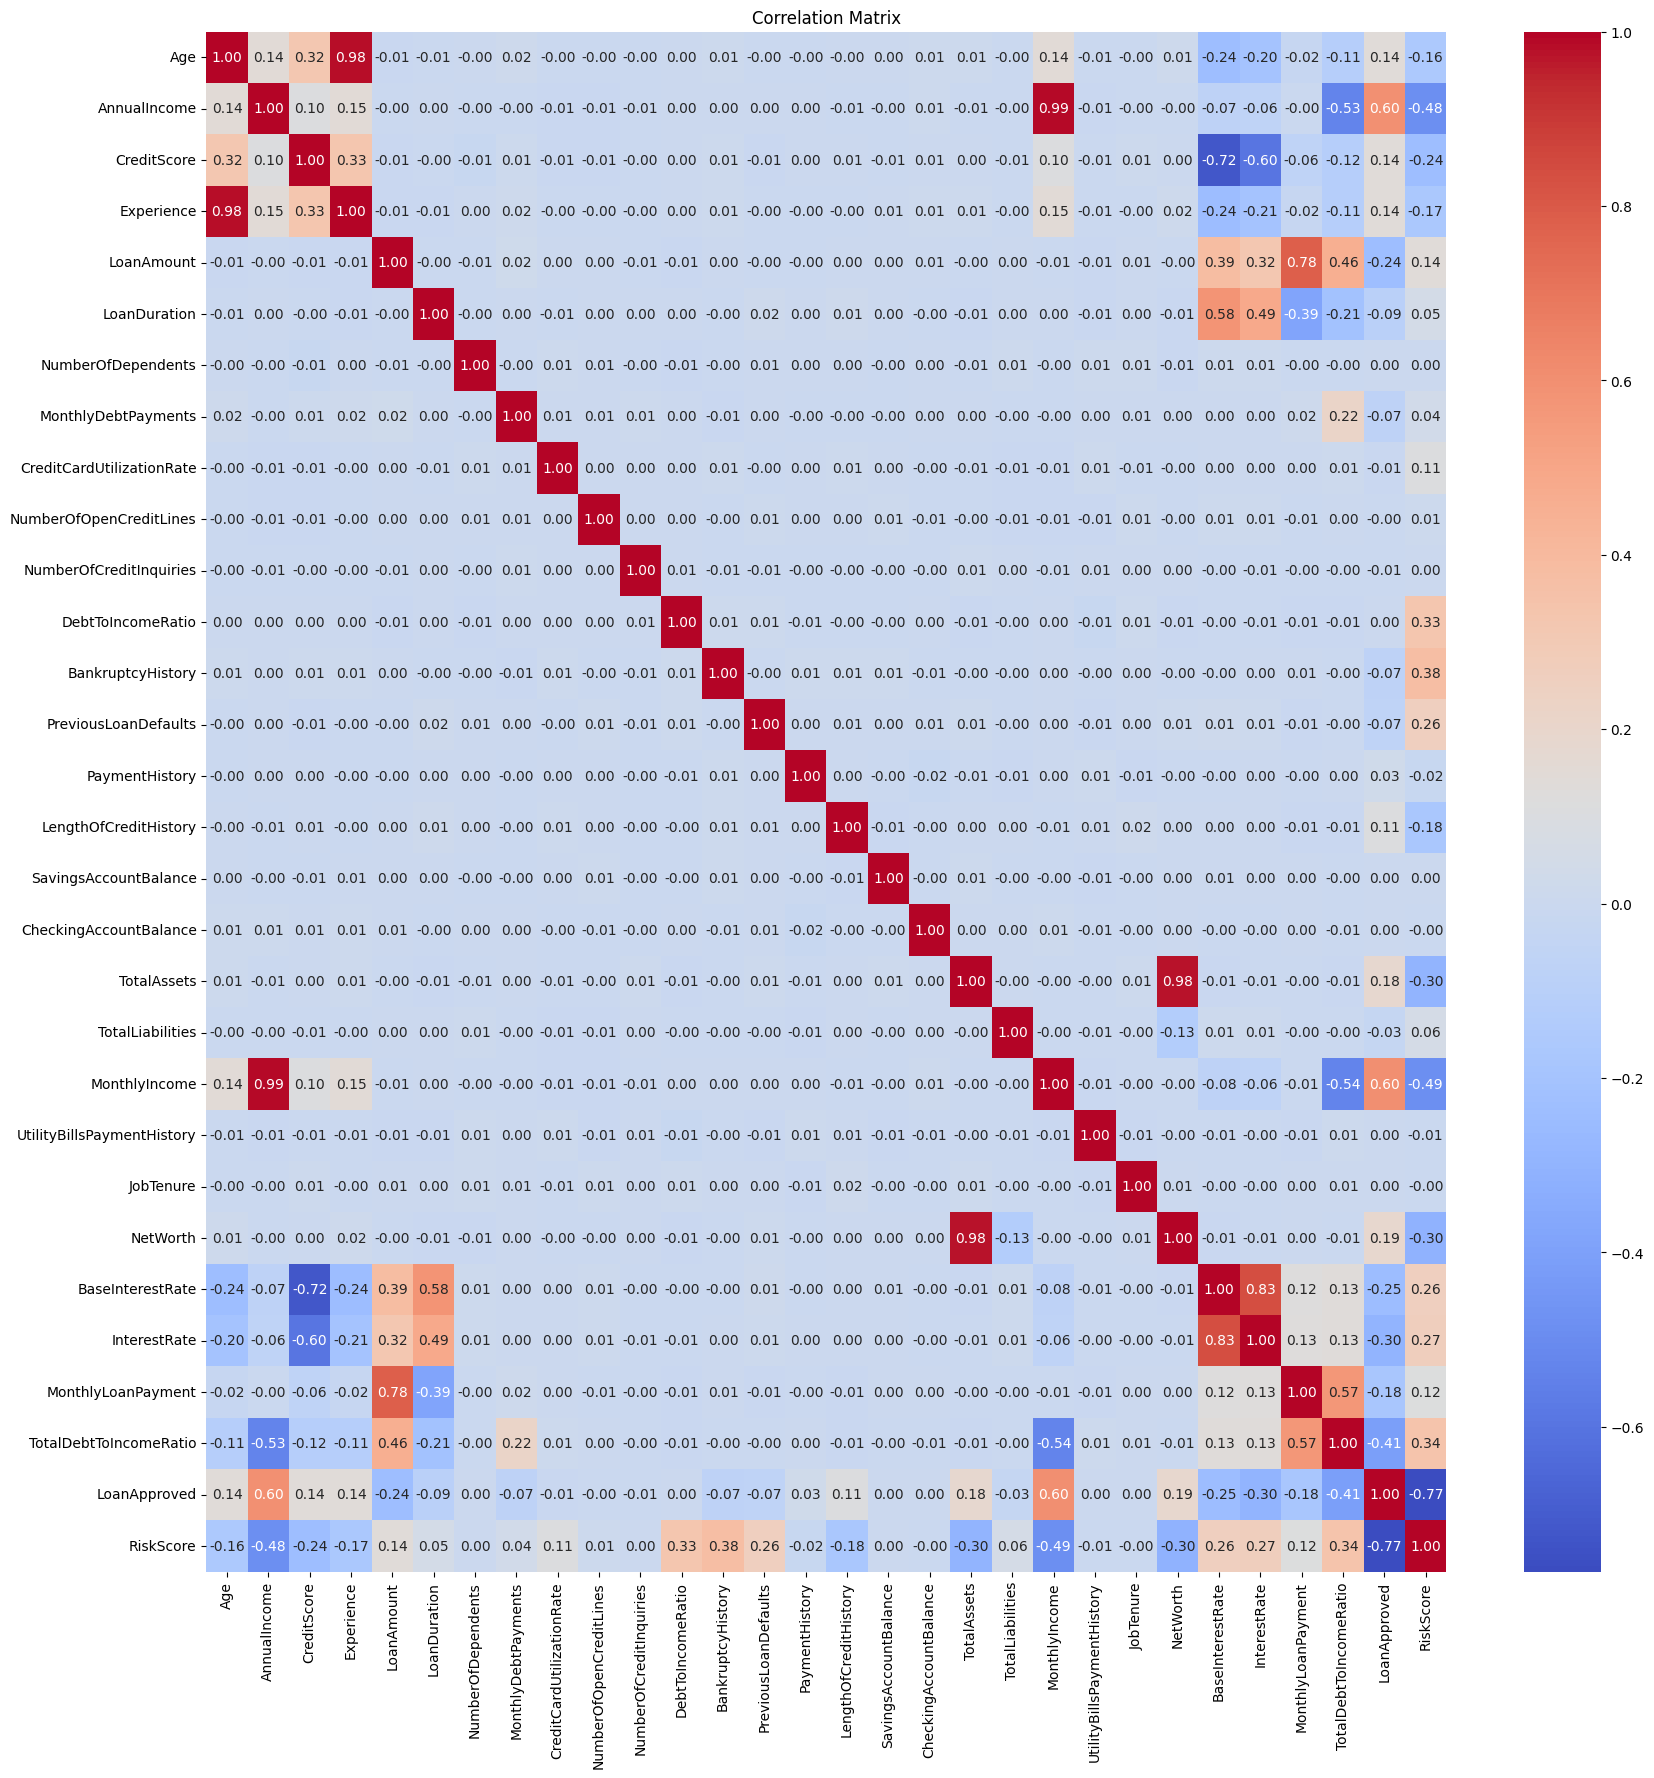

In [4]:
# Correlation Matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

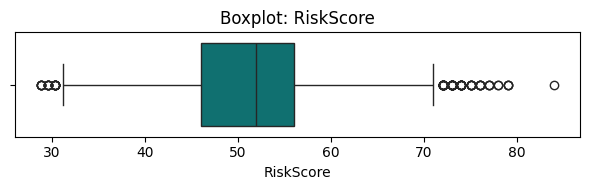

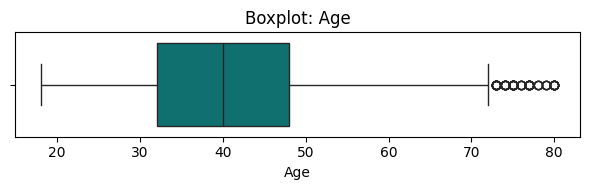

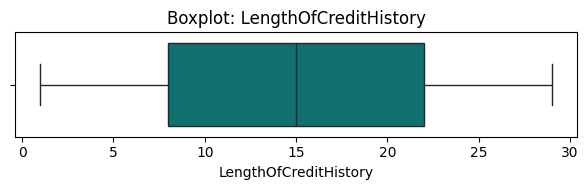

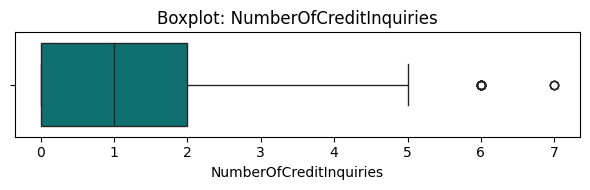

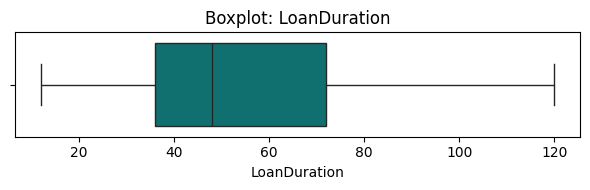

In [5]:
# Boxplots to Spot Outliers
num_cols=["RiskScore","Age","LengthOfCreditHistory","NumberOfCreditInquiries","LoanDuration"]
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col],color="teal")
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

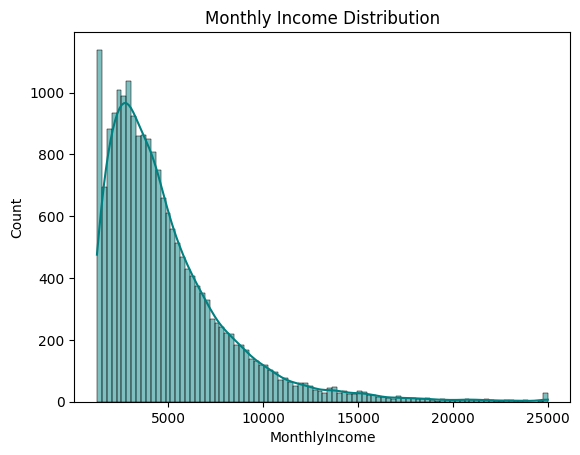

In [6]:
sns.histplot(x=df["MonthlyIncome"],kde=True,color="teal")
plt.title("Monthly Income Distribution")
plt.show()

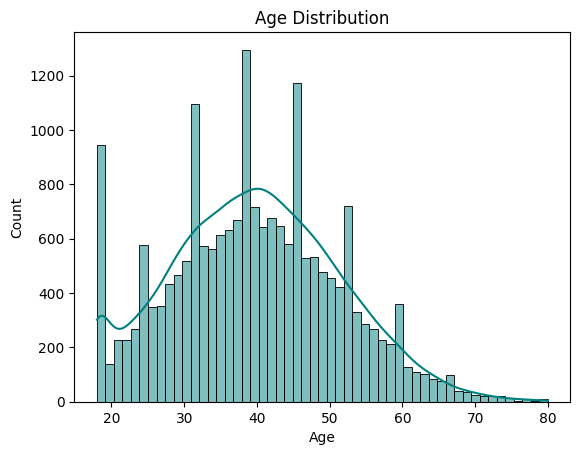

In [7]:
sns.histplot(x=df["Age"],kde=True,color="teal")
plt.title("Age Distribution")
plt.show()

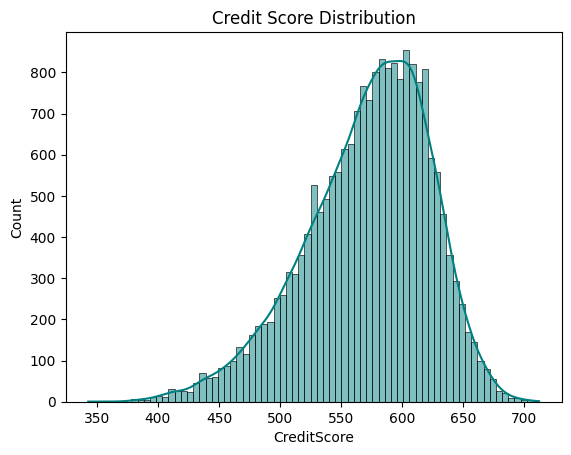

In [8]:
sns.histplot(x=df["CreditScore"],kde=True,color="teal")
plt.title("Credit Score Distribution")
plt.show()

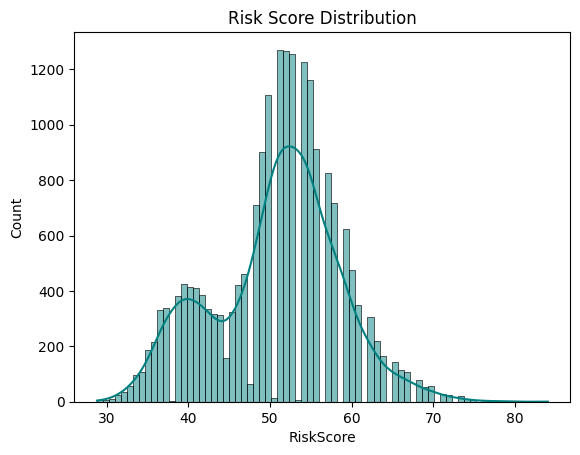

In [9]:
sns.histplot(x=df["RiskScore"],kde=True,color="teal")
plt.title("Risk Score Distribution")
plt.show()

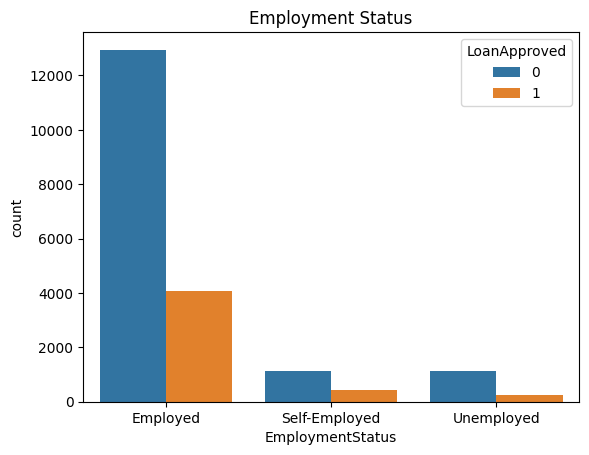

In [10]:
sns.countplot(x=df["EmploymentStatus"],hue=df["LoanApproved"])
plt.title("Employment Status")
plt.show()

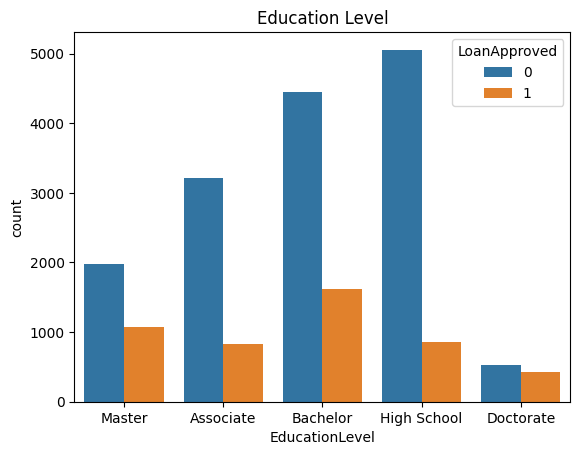

In [11]:
sns.countplot(x=df["EducationLevel"],hue=df["LoanApproved"])
plt.title("Education Level")
plt.show()

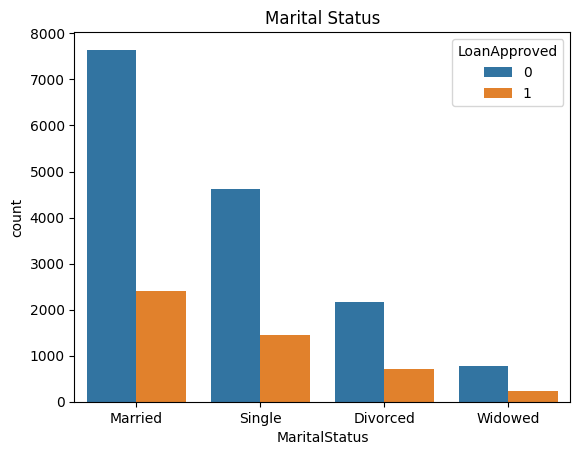

In [12]:
sns.countplot(x=df["MaritalStatus"],hue=df["LoanApproved"])
plt.title("Marital Status")
plt.show()

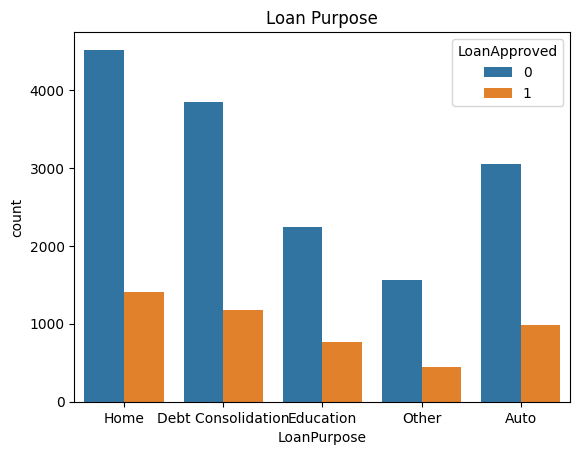

In [13]:
sns.countplot(x=df["LoanPurpose"],hue=df["LoanApproved"])
plt.title("Loan Purpose")
plt.show()

# Data Modelling

## Preprocessing

Dropping unnecessary columns

In [3]:
df.drop("ApplicationDate",axis=1,inplace=True)
df.drop("Age",axis=1,inplace=True) # high correlation with experience
df.drop("MonthlyIncome",axis=1,inplace=True) # high correlation with annual income
df.drop("TotalAssets",axis=1,inplace=True) # high correlation with net worth
df.drop("MonthlyLoanPayment",axis=1,inplace=True) # high correlation with loan payment

Converting categorical columns to numerical using label encoding

In [4]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [5]:
for col in cat_cols:
    print(df[col].value_counts())

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64
LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64


In [6]:
df_encoded=df.copy()
le_dict={}
for col in cat_cols:
    le=LabelEncoder()
    df_encoded[col]=le.fit_transform(df[col])
    le_dict[col]=le

Checking for null values - no missing data found.

In [7]:
print(df_encoded.isnull().sum())

AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalLiabilities              0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
TotalDebtToIncomeRatio        0
LoanApproved                  0
RiskScore                     0
dtype: i

Checking for duplicates - no duplicate values

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(20000, 31)

Scaling the data and splitting into X and y

In [9]:
X=df_encoded.drop("LoanApproved",axis=1)
y=df_encoded["LoanApproved"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
# Saving the scaler as a pickle file
import pickle
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

## Modeling

In [11]:
model=LogisticRegression(random_state=42)
best_model=model.fit(X_train_scaled,y_train)
y_pred=best_model.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test,y_pred)}\n")

Logistic Regression Accuracy: 0.9998571428571429



### Saving the model

In [12]:
import pickle
with open("lr_loan_approval.pkl","wb") as f:
    pickle.dump(best_model,f)

In [13]:
print(X.columns)

Index(['AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus',
       'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalLiabilities',
       'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio',
       'RiskScore'],
      dtype='object')
